# Experiment for downstream localization models at Uji2

In [ ]:
# Dataset: UJIIndoorLoc Data Set 
# Candidates for downstream models:
# KNN, Random Forest (RF), Decision Tree (DT) and Gasussian Processes (GSs)

In [52]:
from pandas import DataFrame, concat
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
import statistics
import matplotlib.pyplot as plt

# Data Cleaning and Exploration

In [53]:
data = pd.read_csv("trainingData.csv")

In [54]:
data.groupby('BUILDINGID').size()

BUILDINGID
0    5249
1    5196
2    9492
dtype: int64

In [55]:
temp = data.groupby('BUILDINGID').get_group(0)

In [56]:
temp.groupby("FLOOR").size()

FLOOR
0    1059
1    1356
2    1443
3    1391
dtype: int64

In [57]:
temp_floor = temp.groupby("FLOOR").get_group(2)

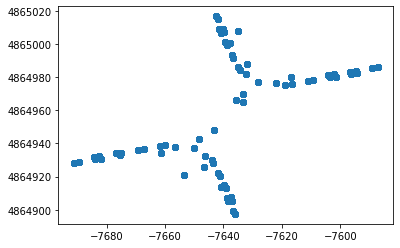

In [58]:
plt.scatter(x=temp_floor['LONGITUDE'],y=temp_floor['LATITUDE'])

In [59]:
temp_floor.groupby("PHONEID").size()

PHONEID
13    710
14    733
dtype: int64

In [60]:
temp_phone = temp_floor.groupby("PHONEID").get_group(14)

USERID
1    733
dtype: int64

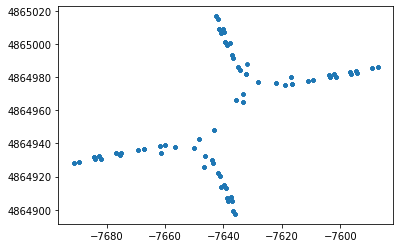

In [61]:
plt.scatter(x=temp_phone['LONGITUDE'],y=temp_phone['LATITUDE'],marker='.')
temp_phone.groupby('USERID').size()

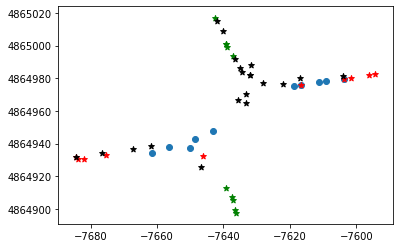

In [62]:
# plt.scatter(x=temp_phone['LONGITUDE'][:80],y=temp_phone['LATITUDE'][:80],marker='o')
plt.scatter(x=temp_phone['LONGITUDE'][30:40],y=temp_phone['LATITUDE'][30:40],marker='o') # testing 
plt.scatter(x=temp_phone[5:10]['LONGITUDE'],y=temp_phone[5:10]['LATITUDE'],c='g',marker='*')   # labeled 10L
plt.scatter(x=temp_phone[55:60]['LONGITUDE'],y=temp_phone[55:60]['LATITUDE'],c='g',marker='*')   # labeled 10L


plt.scatter(x=temp_phone[25:30]['LONGITUDE'],y=temp_phone[25:30]['LATITUDE'],c="red",marker='*') # unlabeled 10U
plt.scatter(x=temp_phone[40:45]['LONGITUDE'],y=temp_phone[40:45]['LATITUDE'],c="red",marker='*') # unlabeled 10U
plt.scatter(x=temp_phone[65:70]['LONGITUDE'],y=temp_phone[65:70]['LATITUDE'],c="black",marker='*') # unlabeled 20U
plt.scatter(x=temp_phone[70:75]['LONGITUDE'],y=temp_phone[70:75]['LATITUDE'],c="black",marker='*') # unlabeled 20U
plt.scatter(x=temp_phone[15:20]['LONGITUDE'],y=temp_phone[15:20]['LATITUDE'],c="black",marker='*') # unlabeled 30U
plt.scatter(x=temp_phone[50:55]['LONGITUDE'],y=temp_phone[50:55]['LATITUDE'],c="black",marker='*') # unlabeled 30U


In [63]:
final_dataset = temp_phone[:80]

In [64]:
final_dataset

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
15889,100,100,100,100,100,100,100,100,-79,100,...,100,-7643.4282,4.864928e+06,2,0,202,2,1,14,1371050499
15890,100,100,100,100,100,100,100,100,-88,100,...,100,-7641.8124,4.864922e+06,2,0,203,2,1,14,1371050517
15891,100,100,100,100,100,100,100,100,-86,100,...,100,-7644.0349,4.864930e+06,2,0,201,2,1,14,1371050481
15892,100,100,100,100,100,100,100,100,-85,100,...,100,-7641.3298,4.864921e+06,2,0,204,2,1,14,1371050536
15893,100,100,100,100,100,100,100,100,100,100,...,100,-7639.6910,4.864915e+06,2,0,205,2,1,14,1371050552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16157,100,100,100,100,100,100,100,100,-82,100,...,100,-7641.8124,4.864922e+06,2,0,203,2,1,14,1371050514
16159,100,100,100,100,100,100,100,100,-86,100,...,100,-7643.4282,4.864928e+06,2,0,202,2,1,14,1371050496
16160,100,100,100,100,100,100,100,100,-83,100,...,100,-7644.0349,4.864930e+06,2,0,201,2,1,14,1371050478
16161,100,100,100,100,100,100,100,100,-85,100,...,100,-7641.3298,4.864921e+06,2,0,204,2,1,14,1371050533


# Select APs

In [65]:
temp1 = []
for i in final_dataset.iloc[:,:-7]:
    temp1.append({"ap":i, "strength":sum(final_dataset[i])})

In [66]:
sorted(temp1, key=lambda k: k['strength'])

[{'ap': 'LONGITUDE', 'strength': -611123.701399982},
 {'ap': 'WAP052', 'strength': -304},
 {'ap': 'WAP051', 'strength': -277},
 {'ap': 'WAP047', 'strength': 567},
 {'ap': 'WAP048', 'strength': 1093},
 {'ap': 'WAP035', 'strength': 1169},
 {'ap': 'WAP155', 'strength': 1261},
 {'ap': 'WAP156', 'strength': 1276},
 {'ap': 'WAP041', 'strength': 1310},
 {'ap': 'WAP013', 'strength': 1414},
 {'ap': 'WAP014', 'strength': 1616},
 {'ap': 'WAP143', 'strength': 1639},
 {'ap': 'WAP036', 'strength': 1690},
 {'ap': 'WAP042', 'strength': 1859},
 {'ap': 'WAP029', 'strength': 1894},
 {'ap': 'WAP030', 'strength': 2059},
 {'ap': 'WAP161', 'strength': 2169},
 {'ap': 'WAP268', 'strength': 2169},
 {'ap': 'WAP142', 'strength': 2193},
 {'ap': 'WAP253', 'strength': 2220},
 {'ap': 'WAP044', 'strength': 2236},
 {'ap': 'WAP043', 'strength': 2246},
 {'ap': 'WAP224', 'strength': 2314},
 {'ap': 'WAP452', 'strength': 2337},
 {'ap': 'WAP162', 'strength': 2499},
 {'ap': 'WAP225', 'strength': 2603},
 {'ap': 'WAP323', 'stre

In [67]:
final_dataset1 = final_dataset.loc[:,('WAP052','WAP051','WAP047','WAP048','LONGITUDE','LATITUDE')]

In [68]:
final_dataset = final_dataset1

In [69]:
final_dataset.replace(100,-93,inplace=True)
# final_dataset.replace(-100,-93,inplace=True)

In [70]:
final_dataset

,WAP052,WAP051,WAP047,WAP048,LONGITUDE,LATITUDE
15889,-93,-88,-65,-77,-7643.4282,4.864928e+06
15890,-91,-90,-81,-81,-7641.8124,4.864922e+06
15891,-93,-93,-79,-83,-7644.0349,4.864930e+06
15892,-71,-80,-88,-88,-7641.3298,4.864921e+06
15893,-86,-86,-87,-93,-7639.6910,4.864915e+06
...,...,...,...,...,...,...
16157,-93,-88,-65,-77,-7641.8124,4.864922e+06
16159,-93,-93,-79,-80,-7643.4282,4.864928e+06
16160,-93,-93,-93,-93,-7644.0349,4.864930e+06
16161,-91,-90,-81,-81,-7641.3298,4.864921e+06


In [71]:
training_data = pd.concat([final_dataset[5:10],final_dataset[55:60],
                           final_dataset[25:30],final_dataset[40:45],
                           final_dataset[65:70],final_dataset[70:75],
                           final_dataset[15:20],final_dataset[50:55]],axis=0)

In [72]:
test_data = final_dataset[30:40].to_numpy()
training_data = training_data.to_numpy()

In [73]:
training_data_10L =  training_data[:10]
training_data_10U =  training_data[10:20]
training_data_20L =  training_data[:20]
training_data_20U =  training_data[10:30]
training_data_30L =  training_data[:30]
training_data_30U =  training_data[10:40]
training_data_40L =  training_data[:40]

# Downstream model performacne evaluation

In [74]:
import importlib
import downstream_models.localization_models as models
importlib.reload(models)

<module 'downstream_models.localization_models' from '/Users/lawrence/Downloads/IPS/downstream_models/localization_models.py'>

# label propagation

In [113]:
import DG_SSL.dg_ssl as dg_ssl
importlib.reload(dg_ssl)

<module 'DG_SSL.dg_ssl' from '/Users/lawrence/Downloads/IPS/DG_SSL/dg_ssl.py'>

In [114]:
propagation_results_10L_10U = dg_ssl.dg_ssl_int(training_data_10L,training_data_10U)[0]
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_10U[10:,-2:],training_data_10U[:,-2:])))
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_10U[:10,-2:],training_data_10L[:,-2:])))

Propagation Error: 52.44601626257511
Propagation Error: 23.780943123207322


In [115]:
propagation_results_10L_20U = dg_ssl.dg_ssl_int(training_data_10L,training_data_20U)[0]
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_20U[10:,-2:],training_data_20U[:,-2:])))
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_20U[:10,-2:],training_data_10L[:,-2:])))

Propagation Error: 20.805721257607694
Propagation Error: 36.22685189495891


In [116]:
propagation_results_10L_30U = dg_ssl.dg_ssl_int(training_data_10L,training_data_30U)[0]
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_30U[10:,-2:],training_data_30U[:,-2:])))
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_30U[:10,-2:],training_data_10L[:,-2:])))

Propagation Error: 21.98569790345637
Propagation Error: 46.53081909721489


In [117]:
# model performance of KNN, DT and RF for different training data 

In [118]:
downstream_models_results_10L = models.evaluation_reg(training_data_10L,test_data,[10,0])
downstream_models_results_20L = models.evaluation_reg(training_data_20L,test_data,[20,0])
downstream_models_results_30L = models.evaluation_reg(training_data_30L,test_data,[30,0])
downstream_models_results_40L = models.evaluation_reg(training_data_40L,test_data,[40,0])
downstream_models_results_10L_10U = models.evaluation_reg(propagation_results_10L_10U,test_data,[10,10])
downstream_models_results_10L_20U = models.evaluation_reg(propagation_results_10L_20U,test_data,[10,20])
downstream_models_results_10L_30U = models.evaluation_reg(propagation_results_10L_30U,test_data,[10,30])

Knn error(m) - 38.50213346693866
Random Forest error(m)- 19.87077614295042
Decision Tree error(m)- 34.08376637789737
 
Knn error(m) - 6.919373904699205
Random Forest error(m)- 12.181595194045977
Decision Tree error(m)- 6.919373904699205
 
Knn error(m) - 8.621432210445434
Random Forest error(m)- 10.827621795303408
Decision Tree error(m)- 12.639088477147947
 
Knn error(m) - 6.76101332880856
Random Forest error(m)- 4.380046316648735
Decision Tree error(m)- 5.526368919545224
 
Knn error(m) - 26.495366420861437
Random Forest error(m)- 22.83643668611112
Decision Tree error(m)- 27.50869007276785
 
Knn error(m) - 14.464096666886432
Random Forest error(m)- 13.168495028670318
Decision Tree error(m)- 15.882461484664256
 
Knn error(m) - 14.136391650106884
Random Forest error(m)- 13.029775244349844
Decision Tree error(m)- 12.866224302674325
 


In [119]:
# Model performance of GPs for different training data 

In [128]:
# Train GPs 
import importlib
import gps_deployment.gps_starting as gps
import gps_deployment.main_controller as gps1
import gps_deployment.gaussian as gps2
importlib.reload(gps)
importlib.reload(gps1)
importlib.reload(gps2)

<module 'gps_deployment.gaussian' from '/Users/lawrence/Downloads/IPS/gps_deployment/gaussian.py'>

In [129]:
# determine the boundary 
lat_min = int(min(training_data[:,-2]))
lat_max = int(max(training_data[:,-2]))
log_min = int(min(training_data[:,-1]))
log_max = int(max(training_data[:,-1]))

In [130]:
# Hyper-parameter optimization; Four GPs will be trained seperately
gps_results_10L = gps.gps_start(4,training_data_10L)
gps_results_20L = gps.gps_start(4,training_data_20L)
gps_results_30L = gps.gps_start(4,training_data_30L)
gps_results_40L = gps.gps_start(4,training_data_40L)
gps_results_10L_10U = gps.gps_start(4,propagation_results_10L_10U)
gps_results_10L_20U = gps.gps_start(4,propagation_results_10L_20U)
gps_results_10L_30U = gps.gps_start(4,propagation_results_10L_30U)

Training gaussian models to find best parameters ..
Optimal hyperparameters:[11.0, 4.0, 0.5]data fit term 4.066753844160013Likelihood-15.247450666794128
None
Training gaussian models to find best parameters ..
Optimal hyperparameters:[10.0, 5.0, 1.0]data fit term 4.891396332131485Likelihood-20.63701064768479
None
Training gaussian models to find best parameters ..
Optimal hyperparameters:[10.0, 6.0, 1.5]data fit term 6.795298192836886Likelihood-25.235388588189142
None
Training gaussian models to find best parameters ..
Optimal hyperparameters:[10.0, 6.0, 2.0]data fit term 6.914685230810574Likelihood-26.980095817448127
None
Training gaussian models to find best parameters ..


FloatingPointError: underflow encountered in det

In [127]:
rlt_10L = gps.gps_evaluation_uji(gps_results_10L,4,test_data,lat_min,lat_max,log_min,log_max,[10,0])
rlt_20L = gps.gps_evaluation_uji(gps_results_20L,4,test_data,lat_min,lat_max,log_min,log_max,[20,0])
rlt_30L = gps.gps_evaluation_uji(gps_results_30L,4,test_data,lat_min,lat_max,log_min,log_max,[30,0])
rlt_40L = gps.gps_evaluation_uji(gps_results_40L,4,test_data,lat_min,lat_max,log_min,log_max,[40,0])
rlt_10L = gps.gps_evaluation_uji(gps_results_10L_10U,4,test_data,lat_min,lat_max,log_min,log_max,[10,10])
rlt_20L = gps.gps_evaluation_uji(gps_results_10L_20U,4,test_data,lat_min,lat_max,log_min,log_max,[10,20])
rlt_30L = gps.gps_evaluation_uji(gps_results_10L_30U,4,test_data,lat_min,lat_max,log_min,log_max,[10,30])

FloatingPointError: underflow encountered in double_scalars

In [50]:
training_data_20L

array([[-8.10000000e+01, -8.10000000e+01,  1.00000000e+02,
         1.00000000e+02, -7.63918010e+03,  4.86491313e+06],
       [-8.70000000e+01, -8.80000000e+01,  1.00000000e+02,
         1.00000000e+02, -7.63700230e+03,  4.86490553e+06],
       [-8.80000000e+01,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02, -7.63755650e+03,  4.86490747e+06],
       [ 1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        -8.50000000e+01, -7.63608360e+03,  4.86489754e+06],
       [ 1.00000000e+02,  1.00000000e+02, -8.60000000e+01,
        -8.80000000e+01, -7.63662260e+03,  4.86489942e+06],
       [-6.90000000e+01, -6.90000000e+01,  1.00000000e+02,
         1.00000000e+02, -7.63717800e+03,  4.86499352e+06],
       [-7.80000000e+01, -7.60000000e+01, -8.10000000e+01,
        -7.80000000e+01, -7.63935000e+03,  4.86500110e+06],
       [-7.90000000e+01, -8.10000000e+01, -8.10000000e+01,
        -7.90000000e+01, -7.63935000e+03,  4.86500110e+06],
       [-7.40000000e+01, -7.80000000e+01, -7.900

array([[-8.10000000e+01, -8.10000000e+01,  1.00000000e+02,
         1.00000000e+02, -7.63918010e+03,  4.86491313e+06],
       [-8.70000000e+01, -8.80000000e+01,  1.00000000e+02,
         1.00000000e+02, -7.63700230e+03,  4.86490553e+06],
       [-8.80000000e+01,  1.00000000e+02,  1.00000000e+02,
         1.00000000e+02, -7.63755650e+03,  4.86490747e+06],
       [ 1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        -8.50000000e+01, -7.63608360e+03,  4.86489754e+06],
       [ 1.00000000e+02,  1.00000000e+02, -8.60000000e+01,
        -8.80000000e+01, -7.63662260e+03,  4.86489942e+06],
       [-6.90000000e+01, -6.90000000e+01,  1.00000000e+02,
         1.00000000e+02, -7.63717800e+03,  4.86499352e+06],
       [-7.80000000e+01, -7.60000000e+01, -8.10000000e+01,
        -7.80000000e+01, -7.63935000e+03,  4.86500110e+06],
       [-7.90000000e+01, -8.10000000e+01, -8.10000000e+01,
        -7.90000000e+01, -7.63935000e+03,  4.86500110e+06],
       [-7.40000000e+01, -7.80000000e+01, -7.900

# 10 labeled

In [ ]:
test_locs = testing.iloc[:,-2:].to_numpy()
plt.scatter(labeled['LONGITUDE'],labeled['LATITUDE'],c='grey',marker = '.',label="Training data")
# plt.scatter(unlabeled['LONGITUDE'],unlabeled['LATITUDE'],c='grey',marker = '.')
plt.plot(testing['LONGITUDE'],testing['LATITUDE'],'r.',label="True Location")
plt.plot(prediction2[:,0],prediction2[:,1],'b*',label="Predicted Location")
for i in range(len(test_locs)):
    plt.arrow(test_locs[i,0],test_locs[i,1],prediction2[i,0]-test_locs[i,0],prediction2[i,1]-test_locs[i,1],head_width=1, head_length=1)
plt.legend()
plt.savefig("Uji2_loc_10L_0U.png")

# 10 labeled + 10 unlabeled 

In [ ]:
test_locs = testing.iloc[:,-2:].to_numpy()
plt.scatter(labeled['LONGITUDE'],labeled['LATITUDE'],c='grey',marker = '.',label="Training data")
plt.scatter(unlabeled['LONGITUDE'],unlabeled['LATITUDE'],c='grey',marker = '.')
plt.plot(testing['LONGITUDE'],testing['LATITUDE'],'r.',label="True Location")
plt.plot(prediction3[:,0],prediction3[:,1],'b*',label="Predicted Location")
for i in range(len(test_locs)):
    plt.arrow(test_locs[i,0],test_locs[i,1],prediction3[i,0]-test_locs[i,0],prediction3[i,1]-test_locs[i,1],head_width=1, head_length=1)
plt.legend()
plt.savefig("Uji2_loc_10L_10U.png")

# 10 labeled + 20 unlabeled 

In [ ]:
# final_result[:10] = labeled.to_numpy()
# final_result
# final_result = pd.DataFrame(final_result)

test_locs = testing.iloc[:,-2:].to_numpy()
plt.scatter(labeled['LONGITUDE'],labeled['LATITUDE'],c='grey',marker = '.',label="Training data")
plt.scatter(unlabeled['LONGITUDE'],unlabeled['LATITUDE'],c='grey',marker = '.')
plt.plot(testing['LONGITUDE'],testing['LATITUDE'],'r.',label="True Location")
plt.plot(prediction1[:,0],prediction1[:,1],'b*',label="Predicted Location")
for i in range(len(test_locs)):
    plt.arrow(test_locs[i,0],test_locs[i,1],prediction1[i,0]-test_locs[i,0],prediction1[i,1]-test_locs[i,1],head_width=1, head_length=1)
plt.legend()
plt.savefig("Uji2_loc_10L_20U.png")

# 10 labeled + 20 unlabeled 

In [ ]:
test_locs = testing.iloc[:,-2:].to_numpy()
plt.scatter(labeled['LONGITUDE'],labeled['LATITUDE'],c='grey',marker = '.',label="Training data")
plt.scatter(unlabeled['LONGITUDE'],unlabeled['LATITUDE'],c='grey',marker = '.')
plt.plot(testing['LONGITUDE'],testing['LATITUDE'],'r.',label="True Location")
plt.plot(prediction2[:,0],prediction2[:,1],'b*',label="Predicted Location")
for i in range(len(test_locs)):
    plt.arrow(test_locs[i,0],test_locs[i,1],prediction2[i,0]-test_locs[i,0],prediction2[i,1]-test_locs[i,1],head_width=1, head_length=1)
plt.legend()
plt.savefig("Uji2_loc_10L_30U.png")